# 3A1 lab plots

In [1]:
index_to_body_dict = {0:'Flat Plate',1:'Sphere',
                      2:'Sphere with Tripwire',
                      3:'Streamline Body'}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('3A1a lab data.xlsx', sheet_name='from notebook')

In [4]:
def data_extraction(column):

    index = -1
    index_change = False
    
    for row in column:
        if pd.isnull(row):
            if index_change == False:
                if index >= 0:
                    if index == 0:
                        data = np.array(data_list)
                    else:
                        data = np.vstack((data,np.array(data_list)))
                data_list = []
                index += 1
                index_change = True
        else:
            data_list.append(row)
            if index_change == True:
                index_change = False
    
    data = np.vstack((data,np.array(data_list)))
    return data

In [5]:
c_d = data_extraction(df['C_d'])
re = data_extraction(df['Re'])

In [6]:
c_d,re

(array([[1.372, 1.238, 1.235, 1.218, 1.185, 1.184, 1.192, 1.17 , 1.193,
         1.181, 1.176, 1.172],
        [0.643, 0.627, 0.553, 0.527, 0.514, 0.511, 0.409, 0.345, 0.295,
         0.271, 0.245, 0.199],
        [0.473, 0.39 , 0.32 , 0.282, 0.284, 0.285, 0.265, 0.272, 0.265,
         0.257, 0.241, 0.243],
        [0.194, 0.18 , 0.179, 0.146, 0.13 , 0.131, 0.134, 0.127, 0.118,
         0.108, 0.104, 0.101]]),
 array([[142000., 184000., 224000., 263000., 302000., 328000., 350000.,
         374000., 397000., 421000., 438000., 456000.],
        [122000., 191000., 225000., 268000., 298000., 323000., 348000.,
         374000., 397000., 419000., 438000., 455000.],
        [119000., 191000., 231000., 263000., 296000., 324000., 350000.,
         370000., 396000., 414000., 436000., 455000.],
        [141000., 191000., 222000., 260000., 292000., 323000., 347000.,
         373000., 394000., 413000., 437000., 454000.]]))

In [7]:
c_d.shape,re.shape

((4, 12), (4, 12))

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


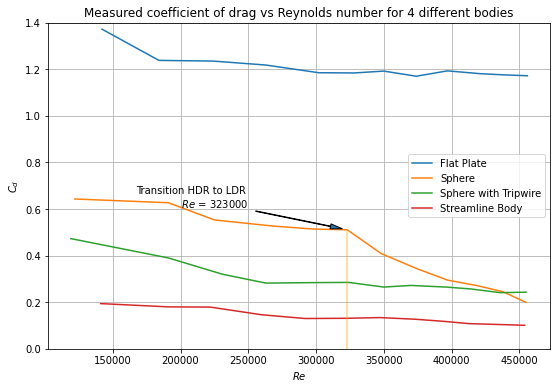

In [8]:
index = 0

fig, ax = plt.subplots(1)
fig.set_size_inches(9,6)

for c_d_vals,re_vals in zip(c_d,re):
    ax.plot(re_vals,c_d_vals,label=index_to_body_dict[index])
    index += 1
    
ax.annotate('Transition HDR to LDR \n $Re$ = 323000', xy=(323000, 0.511),  xycoords='data',
            xytext=(0.4, 0.5), textcoords='axes fraction',
            arrowprops=dict(width=0.5, headwidth=5, shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.plot([323000]*100, np.linspace(-0.1,0.5,100), color='orange', alpha=0.5)
ax.legend(loc='best')
ax.set_ylabel('$C_d$')
ax.set_xlabel('$Re$')
ax.set_ylim(0,1.4)
ax.grid()
ax.set_title('Measured coefficient of drag vs Reynolds number for 4 different bodies')
# fig.savefig('C_D against Re plot.png',pad_inches=0)
fig.show()

## Error calculations

In [9]:
def calculate_U_error(x):
    p1_p2 = x['p1-p2/mBar']
    p_error = x['p1-p2 error']
    U = x['U/(m/s)']
    
    if pd.isnull(p1_p2):
        pass
    else:
        U_error = 0.5*(p_error/p1_p2)*U
        return U_error

In [10]:
def calculate_C_d_error(x):
    U_squared_error = 2*x['U error']
    U_squared = x['U/(m/s)']**2
    reading_error = x['drag reading error']
    reading = x['drag reading']
    C_d = x['C_d']
#     print(U_squared,U_squared_error,reading,reading_error,C_d)
    
    if pd.isnull(reading):
        pass
    else:
        C_d_error = C_d*np.sqrt((reading_error/reading)**2+(U_squared_error/U_squared)**2)
#         print(C_d_error)
        return C_d_error
    

In [12]:
df['U error'] = df.apply(calculate_U_error,axis=1)
df['C_d error'] = df.apply(calculate_C_d_error,axis=1)

In [13]:
c_d = data_extraction(df['C_d'])
c_d_errors = data_extraction(df['C_d error'])
re = data_extraction(df['Re'])

if c_d.shape == c_d_errors.shape:
    if c_d_errors.shape == re.shape:
        pass
    else:
        raise ShapeError('c_d_errors and re shapes do not match, shapes are : {} {} '.format(c_d_errors.shape,re.shape))
else: 
    raise ShapeError('c_d_errors and c_d shapes do not match, shapes are : {} {} '.format(c_d_errors.shape,c_d.shape))
        

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


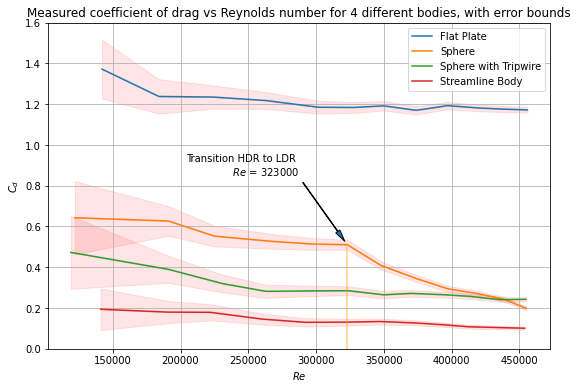

In [14]:
index = 0

fig, ax = plt.subplots(1)
fig.set_size_inches(9,6)

for c_d_vals,re_vals,error_vals in zip(c_d,re,c_d_errors):
    ax.plot(re_vals,c_d_vals,label=index_to_body_dict[index])
    ax.fill_between(re_vals,c_d_vals+error_vals,c_d_vals, color='red', alpha=0.1)
    ax.fill_between(re_vals,c_d_vals,c_d_vals-error_vals, color='red', alpha=0.1)
    index += 1
    
ax.annotate('Transition HDR to LDR \n $Re$ = 323000', xy=(323000, 0.511),  xycoords='data',
            xytext=(0.5, 0.6), textcoords='axes fraction',
            arrowprops=dict(width=0.5, headwidth=5, shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.plot([323000]*100, np.linspace(-0.1,0.5,100), color='orange', alpha=0.5)
ax.legend(loc='best')
ax.set_ylabel('$C_d$')
ax.set_xlabel('$Re$')
ax.set_ylim(0,1.6)
ax.grid()
ax.set_title('Measured coefficient of drag vs Reynolds number for 4 different bodies, with error bounds')
# fig.savefig('C_D against Re plot with error.png',pad_inches=0)
fig.show()

In [15]:
df.to_excel('data_from_workbook.xlsx', sheet_name='from notebook')